<a href="https://colab.research.google.com/github/ryannemilligan/Unsupervised-Learning-Book-Recommentation/blob/main/Book_Recommendation_UL_Ryanne_Milligan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Book Recommendation

# The Scenario

A recommendation engine is a class of machine learning which offers relevant suggestions to the customer.  

Before the recommendation system, the primary tendency to buy was to take suggestions from friends.But now Google knows what news you will read, Youtube knows what type of videos you will watch based on your search history, watch history, or purchase history.

A recommendation system helps an organization to create loyal customers and build trust in desired products and services for which they visited your site.

**A book recommendation system** is a type of recommendation system where we have to recommend similar books to the reader based on his interest.

The books recommendation system is used by online websites which provide ebooks like Google Play Books, Open Library, Goodreads, etc.


# Tips for working on this project
You will be using these three concepts to be able to successfully complete this project:
1. Deep Learning models
2. AI Project Cycle <br>
3. Understanding of Supervised Learning <br>

If needed, please revise your notes on these topics.

# Section 1: Understand the Problem

One of the key points of solving an AI problem is to understand the problem statement correctly. <br>
You need to understand what is the correct problems that you are solving.<br>
You want to solve the root problem and not the symptoms.<br>
To do that, you can use tools like 5 Whys, decomposition, and Fish-bone diagram.<br>
You can then write your problem statement.<br>
It may include helpful information, like who is affected, what is the problem, where is it happening, and when does it happen.<br>

Based on the scenario above, write your problem statement in the cell below!<br>

In [ ]:
# Your answers here!

# Book Recommendation will help people to select a book of their interest.
# Book Recommendation will reduce the efforts to select a book based on the user's previous preferences.
# However, to make recommendations for books, we need to have a good machine learning algorithm.
# Therefore, it is important to develop an AI model that can automatically recommend books.

# Who's affected? - Online readers who used Google Play Books, Open Library, and Goodreads
# What is the problem? - Cannot find books that peak interest due to overload of options and no personalization
# Where? - Online platforms with a large library of ebooks.
# When? - When a user finishes a book, look for a new one, or exploring genres they are unfamiliar with

# Root problem? - Lack of a personalized system that recommends books that match individual user preferences.

# Goal of this project? - To develop an AI-powered recommendation system that will suggest books relevant to users based on history, preferences, and their behaviors.

# Impact of project? - To make users happy, shorten time searching for new books, and build loyalty in the platform.

# Section 2: Data Acquisition

Data is the main ingredient for AI model. <br>
For a typical scenario for book recommendation sysem, where can you find your data? <br>
Write your answer in the cell below. <br>

In this scenario, you are given a few files.<br>
These files are downloaded from: https://www.kaggle.com/abhinavjhanwar/book-recommender-content-collaborative/data<br>


In [ ]:
# Your answers here!

# There are many sources that we can use.
# There are online sources like Kaggle.
# We can also capture our own data, just like what Google has been doing.

## The Machine Learning Models
What are different types of AI models ? <br>
In what areas of our life is AI important? <br>
How does Unsupervised learning affect our daily life?<br>
Write your answer in the cell below.

In [ ]:
# Your answer here!

# AI Models include: supervised, unsupervised and reinforcement learning.
# AI plays an important role in decision making, healthcare, fraud prediction and many more applications.
# Unsupervised algorithms help machine to predict the behaviour of Humans without human intervention

# Import libraries

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed.
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here are several helpful packages to load:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Loading Datasets

In [ ]:
# Read Datasets(Ratings.csv, Users.csv, Books.csv) provided in the folder.


# Data Exploration

Understanding the Datasets

In [ ]:
# Print concise summary of Ratings.csv Dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [ ]:
# Print concise summary of Users.csv Dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [ ]:
# Print concise summary of Books.csv Dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [ ]:
# Remove 'DK Publishing Inc', 'Gallimard' values from 'Year-Of-Publication' column and convert to int


**Final Datasets after removing and conversion to int must look like:**


**Dataset 1 - Rating.csv (11149780)**

User-ID - user ID<br>
ISBN - book ID<br>
Book-Rating - Rating given by user<br>


**Dataset 2 - Users.csv (278858)**

User-ID - user ID<br>
Location - location of user<br>
Age - age of user<br>


**Dataset 3 - Books.csv (271360)**

ISBN - book ID<br>
Book-Title - Book Name<br>
Book-Author<br>
Year-Of-Publication<br>
Publisher<br>
Image-URL-S<br>
Image-URL-M<br>
Image-URL-L<br>

# Exploratory Data Analysis


In [ ]:
def plot_distribution(feature, data):
    sns.displot(x=feature, data=data, kde=True, color='#244747');
    plt.figtext(0.2, 1, '%s Distribution'%feature, fontfamily='serif', fontsize=17, fontweight='bold');

## Distribution of User as per age

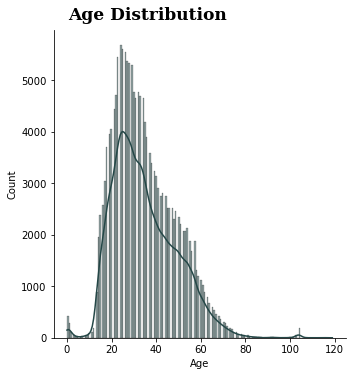

In [ ]:
# Plot graph showing Distribution of users as per age


## Distribution across years of publication

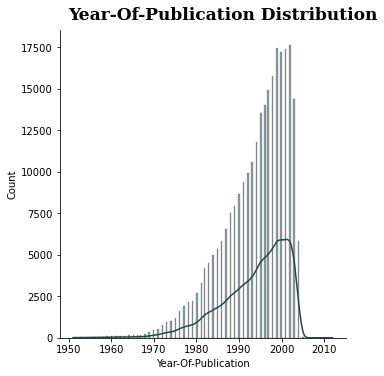

In [ ]:
# Plot graph showing Distribution across year of publication


# Recommendor 1 : Demographic Filtering


## 1. Top 20 Highest Rated Books


In [ ]:
data = df1.groupby('ISBN').agg(['mean', 'count'])['Book-Rating'].reset_index()

# generate score based on mean rating and total number of times the book is rated
m = data['count'].quantile(0.99) # minimum votes required to be listed in the Top 250
data = data[data['count']>m]
print('m =', m)
print(data.shape)
R = data['mean'] # average for the book (mean) = (Rating)
v = data['count'] # number of votes for the book = (votes)
C = data['mean'].mean() # mean vote across all books
data['weighted rating'] = (v/(v+m))*R + (m/(v+m))*C
data = data.sort_values('weighted rating', ascending=False).reset_index(drop=True)

# get title of books
data = pd.merge(data, df3, on='ISBN')[['Book-Title', 'Book-Author', 'mean', 'count', 'weighted rating',
                              'Year-Of-Publication']].drop_duplicates('Book-Title').iloc[:20]
data

m = 36.0
(3306, 3)


,Book-Title,Book-Author,mean,count,weighted rating,Year-Of-Publication
0,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,6.541237,194,5.985285,2000
1,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,6.611765,170,5.978717,1999
2,Free,Paul Vincent,7.962963,54,5.973507,2003
3,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,6.467005,197,5.929681,1999
4,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,6.363095,168,5.767724,1998
5,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,5.571856,334,5.320583,2003
6,The Fellowship of the Ring (The Lord of the Ri...,J. R. R. Tolkien,6.206349,63,5.036522,1999
7,Griffin &amp; Sabine: An Extraordinary Corresp...,Nick Bantock,6.041667,72,5.024219,1991
9,Falling Up,Shel Silverstein,6.921053,38,5.008320,1996
10,The Stand (The Complete and Uncut Edition),Stephen King,6.175439,57,4.942104,1990


## Top 20 Highest Rated Authors

In [ ]:
# drop any duplicates in df3


# get book-author and title from df3


# generate score based on mean rating and total number of times the author is rated
m = data['count'].quantile(0.99) # minimum votes required to be listed in the Top 250
data = data[data['count']>m]
print('m =', m)
print(data.shape)
# average for the author (mean) = (Rating)


# number of votes for the author = (votes)


# mean vote across all authors


data['weighted rating'] = (v/(v+m))*R + (m/(v+m))*C
data = data.sort_values('weighted rating', ascending=False).reset_index(drop=True)

data.iloc[:20]

m = 130.0
(996, 3)


,Book-Author,mean,count,weighted rating
0,J. K. Rowling,5.411434,2134,5.263202
1,Bill Watterson,5.498134,536,4.977312
2,J. R. R. Tolkien,5.265861,662,4.866023
3,Shel Silverstein,6.273333,150,4.674607
4,Dr. Seuss,5.168044,363,4.551501
5,Nick Bantock,5.278810,269,4.480927
6,Harper Lee,4.932039,412,4.427841
7,J.R.R. TOLKIEN,4.511224,980,4.314315
8,Neil Gaiman,4.453074,1236,4.298602
9,Daniel Quinn,5.012295,244,4.253716


## Recommender 2: Collaborative Filtering

Based on records from various users provide recommendations based on user similarities.



In [ ]:
# merge df1 and df5 to get movie titles and drop rows for which title is not available


# get total counts of no. of occurence of book


# fetch top 100 books based on count
isbn = data.drop_duplicates('ISBN').sort_values(
    'count', ascending=False).iloc[:100]['ISBN']

# filter out data as per the ISBN
data = data[data['ISBN'].isin(isbn)].reset_index(drop=True)

In [ ]:
# create a user book rating matrix


ISBN,0060392452,0060502258,0060928336,0060930535,0060934417,0060938455,0060959037,0060976845,0060987103,0061009059,...,0743237188,0743418174,0786868716,080410526X,0804106304,0805063897,0842329129,0971880107,1400034779,1558743669
User-ID,,,,,,,,,,,,,,,,,,,,,
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# get user-ID for users who have read more than 50 books


,User-ID,0
629,11676,100
912,16795,70
1158,21014,54
1323,23768,54
2131,35859,69
2647,43246,54
3682,60244,53
4628,76352,54
4769,78783,51
6170,102967,54


### Using Surpise Library

Surprise is a Python scikit for building and analyzing recommender systems that deal with explicit rating data.

In [ ]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import train_test_split, cross_validate

In [ ]:
reader = Reader(rating_scale=(0, 10))
surprise_data = Dataset.load_from_df(data[['User-ID', 'ISBN', 'Book-Rating']], reader)
trainset, testset = train_test_split(surprise_data, test_size=0.25)

In [ ]:
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD()]:
    # Perform cross validation
    results = cross_validate(algorithm, surprise_data, measures=['RMSE'], cv=3, verbose=False)

    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)

pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')

,test_rmse,fit_time,test_time
Algorithm,,,
SVD,3.909694,2.254615,0.146766


In [ ]:
svd = SVD()
svd.fit(trainset)

In [ ]:
index_val = 2131
# get user id
userId = df.index[index_val]
books = []
ratings = []
titles = []

for isbn in df.iloc[index_val][df.iloc[index_val].isna()].index:
    books.append(isbn)
    title = data[data['ISBN']==isbn]['Book-Title'].values[0]
    titles.append(title)
    ratings.append(svd.predict(userId, isbn).est)

prediction = pd.DataFrame({'ISBN':books, 'title':titles, 'rating':ratings, 'userId':userId})
prediction = prediction.sort_values('rating', ascending=False).iloc[:10].reset_index(drop=True)

# get other high rated books by user
temp = data[data['User-ID']==df.index[index_val]].sort_values(
    'Book-Rating', ascending=False)[['Book-Rating', 'Book-Title', 'User-ID']].iloc[:10].reset_index(drop=True)
prediction['Book Read'] = temp['Book-Title']
prediction['Rated']= temp['Book-Rating']
prediction

,ISBN,title,rating,userId,Book Read,Rated
0,0743237188,Fall On Your Knees (Oprah #45),7.726538,35859,Fahrenheit 451,10
1,0786868716,The Five People You Meet in Heaven,7.014767,35859,Harry Potter and the Sorcerer's Stone (Harry P...,10
2,0316769487,The Catcher in the Rye,5.555539,35859,One for the Money (Stephanie Plum Novels (Pape...,10
3,0316776963,Me Talk Pretty One Day,5.208505,35859,The Red Tent (Bestselling Backlist),10
4,0684872153,Angela's Ashes (MMP) : A Memoir,4.617813,35859,Bel Canto: A Novel,9
5,0553268880,The Prince of Tides,4.482820,35859,The Secret Life of Bees,9
6,0345380371,Rising Sun,4.480722,35859,Left Behind: A Novel of the Earth's Last Days ...,9
7,0060959037,Prodigal Summer: A Novel,4.023027,35859,The Joy Luck Club,8
8,0515131229,Dance upon the Air (Three Sisters Island Trilogy),3.740787,35859,Two for the Dough,8
9,0060392452,Stupid White Men ...and Other Sorry Excuses fo...,3.221148,35859,Balzac and the Little Chinese Seamstress : A N...,8


In [ ]:
index_val = 912
# get user id


# get other high rated books by user


,ISBN,title,rating,userId,Book Read,Rated
0,0345313860,"The Vampire Lestat (Vampire Chronicles, Book II)",9.060628,16795,"A Child Called \It\"": One Child's Courage to S...",10
1,0805063897,Nickel and Dimed: On (Not) Getting By in America,7.113744,16795,The Da Vinci Code,10
2,0316284955,White Oleander : A Novel (Oprah's Book Club),6.321155,16795,The Lovely Bones: A Novel,10
3,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,6.185953,16795,The Secret Life of Bees,10
4,0440241073,The Summons,6.161030,16795,She's Come Undone (Oprah's Book Club),10
5,0060959037,Prodigal Summer: A Novel,6.156004,16795,The Notebook,10
6,0380789035,American Gods,6.112781,16795,House of Sand and Fog,9
7,0345391055,Disclosure,6.002154,16795,The Red Tent (Bestselling Backlist),9
8,0446611212,Violets Are Blue,5.962069,16795,The Horse Whisperer,9
9,0060938455,Fast Food Nation: The Dark Side of the All-Ame...,5.669577,16795,The Bridges of Madison County,9


## Using mean of other users' weighted ratings based on similarity matrix


Here, assumed rating may not make much sense as most of the books are not read by other users.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# replace NaN with user based average rating in pivot dataframe


# get similarity between all users


In [ ]:
def get_recommendation(user_index):
    idx = user_index
    sim_scores = list(enumerate(similarity_matrix[idx]))

    # get books that are unrated by the given user


    # get weighted ratings of unrated books by all other users



    # get top 100 similar users by skipping the current user
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:101]

    # get mean of book ratings by top 100 most similar users for the unrated books


    # get rid of null values and sort it based on ratings


    # get recommended book titles in sorted order
    recommended_books = data[data['ISBN'].isin(book_ratings['ISBN'])][['ISBN', 'Book-Title']]
    recommended_books = recommended_books.drop_duplicates('ISBN').reset_index(drop=True)
    assumed_ratings = book_ratings[0].reset_index(drop=True)

    return pd.DataFrame({'ISBN':recommended_books['ISBN'],
                         'Recommended Book':recommended_books['Book-Title'],
                         'Assumed Rating':assumed_ratings})

In [ ]:
user_index = 2131
recommended_books = get_recommendation(user_index)
# get other high rated books by user
temp = data[data['User-ID']==df.index[user_index]].sort_values(
    'Book-Rating', ascending=False)[['Book-Rating', 'Book-Title', 'User-ID']].iloc[:10].reset_index(drop=True)
recommended_books['userId'] = temp['User-ID']
recommended_books['Book Read'] = temp['Book-Title']
recommended_books['Rated']= temp['Book-Rating']
recommended_books

NameError: name 'get_recommendation' is not defined

In [ ]:
# Recommend Books for user_index = 6349


,ISBN,Recommended Book,Assumed Rating,userId,Book Read,Rated
0,0671510053,SHIPPING NEWS,7.467531,106225,Girl with a Pearl Earring,10
1,1558743669,"A Child Called \It\"": One Child's Courage to S...",7.000075,106225,Angela's Ashes (MMP) : A Memoir,9
2,0060930535,The Poisonwood Bible: A Novel,6.980253,106225,"Tuesdays with Morrie: An Old Man, a Young Man,...",9
3,0345339681,The Hobbit : The Enchanting Prelude to The Lor...,6.980253,106225,A Painted House,9
4,0446672211,Where the Heart Is (Oprah's Book Club (Paperba...,6.980202,106225,The Lovely Bones: A Novel,8
5,0345378490,Congo,6.967019,106225,Good in Bed,8
6,0375727345,House of Sand and Fog,6.927949,106225,White Oleander : A Novel (Oprah's Book Club),8
7,0345339703,The Fellowship of the Ring (The Lord of the Ri...,6.609094,106225,The Secret Life of Bees,8
8,0060959037,Prodigal Summer: A Novel,6.382191,106225,The Brethren,6
9,0375700757,Cold Mountain : A Novel,6.223824,106225,The Handmaid's Tale,0
